## import Library and Framework

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

## read dataset

In [5]:
df = pd.read_csv('car.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## create CAN Data Frame

In [16]:
cdf = df[['enginesize','horsepower','citympg','highwaympg','boreratio','price']]
cdf.head()

,enginesize,horsepower,citympg,highwaympg,boreratio,price
0,130,111,21,27,3.47,13495.0
1,130,111,21,27,3.47,16500.0
2,152,154,19,26,2.68,16500.0
3,109,102,24,30,3.19,13950.0
4,136,115,18,22,3.19,17450.0


## Examine the data by plotting

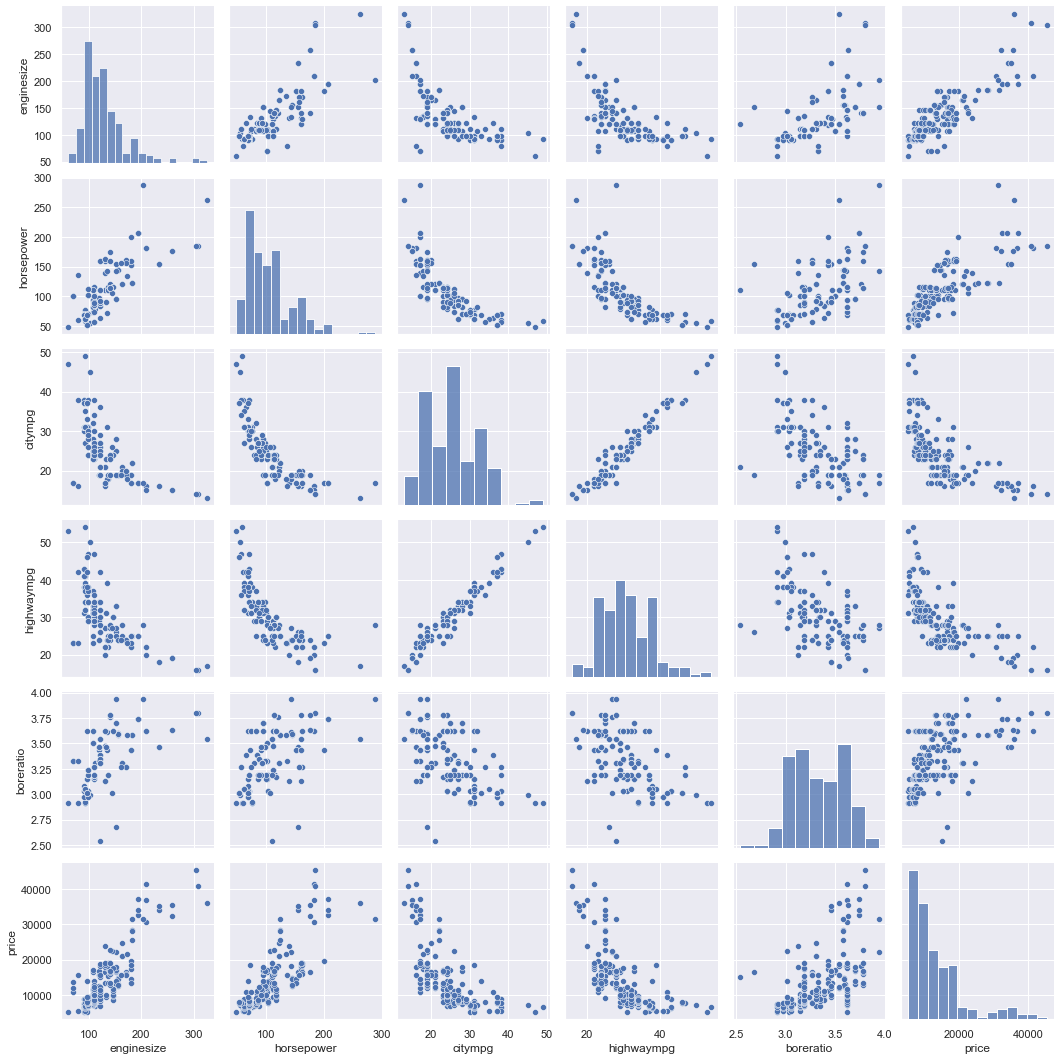

In [34]:
sns.set_theme()
sns.pairplot(data=cdf)

#### check last row plotting 
(enginesize - price) and (horsepower - price) : nearly linear



## Train / Test Split - Create data Train and Test

In [50]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## create x and y values

In [51]:
train_x = np.asanyarray(train[['enginesize','horsepower']])
train_y = np.asanyarray(train[['price']])

test_x  = np.asanyarray(test[['enginesize','horsepower']])
test_y  = np.asanyarray(test[['price']])

# plot train and test 

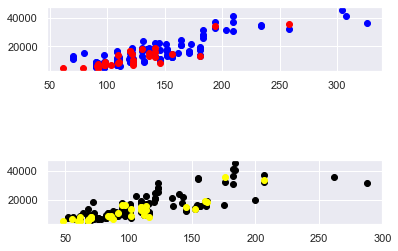

In [52]:
figure = plt.figure()
ax1 = figure.add_subplot(311)
ax1.scatter(train.enginesize,train.price,color='blue')
ax1.scatter(test.enginesize,test.price,color='red')
ax2 = figure.add_subplot(313)
ax2.scatter(train.horsepower,train.price,color='black')
ax2.scatter(test.horsepower,test.price,color='yellow')
plt.show()

### Find $\beta_0$ , $\beta_1$ , $\beta_2$ in multiple linear regression
$ \hat y $ defined as $\hat y =  \beta_0 +\beta_1 x_1 +\beta_2 x_2 $

$x_1 := $ value enginesize

$x_2 := $ value horsepower

In [55]:
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)
beta_0 = reg.intercept_[0]
beta_1 , beta_2 = reg.coef_[0]
print(f"beta_0 vlaue is {beta_0} , beta_1 vlaue is {beta_1} beta_2 vlaue is {beta_2}")

beta_0 vlaue is -8387.11484606751 , beta_1 vlaue is 126.27400958614257 beta_2 vlaue is 54.784206076059974


## calculate $R^2$ value 

In [63]:
test_y_hat = reg.predict(test_x)
r2 = r2_score(test_y,test_y_hat)
print(f'r2 : {r2}')

r2 : 0.7952093054287939
